<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
df.head(20)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


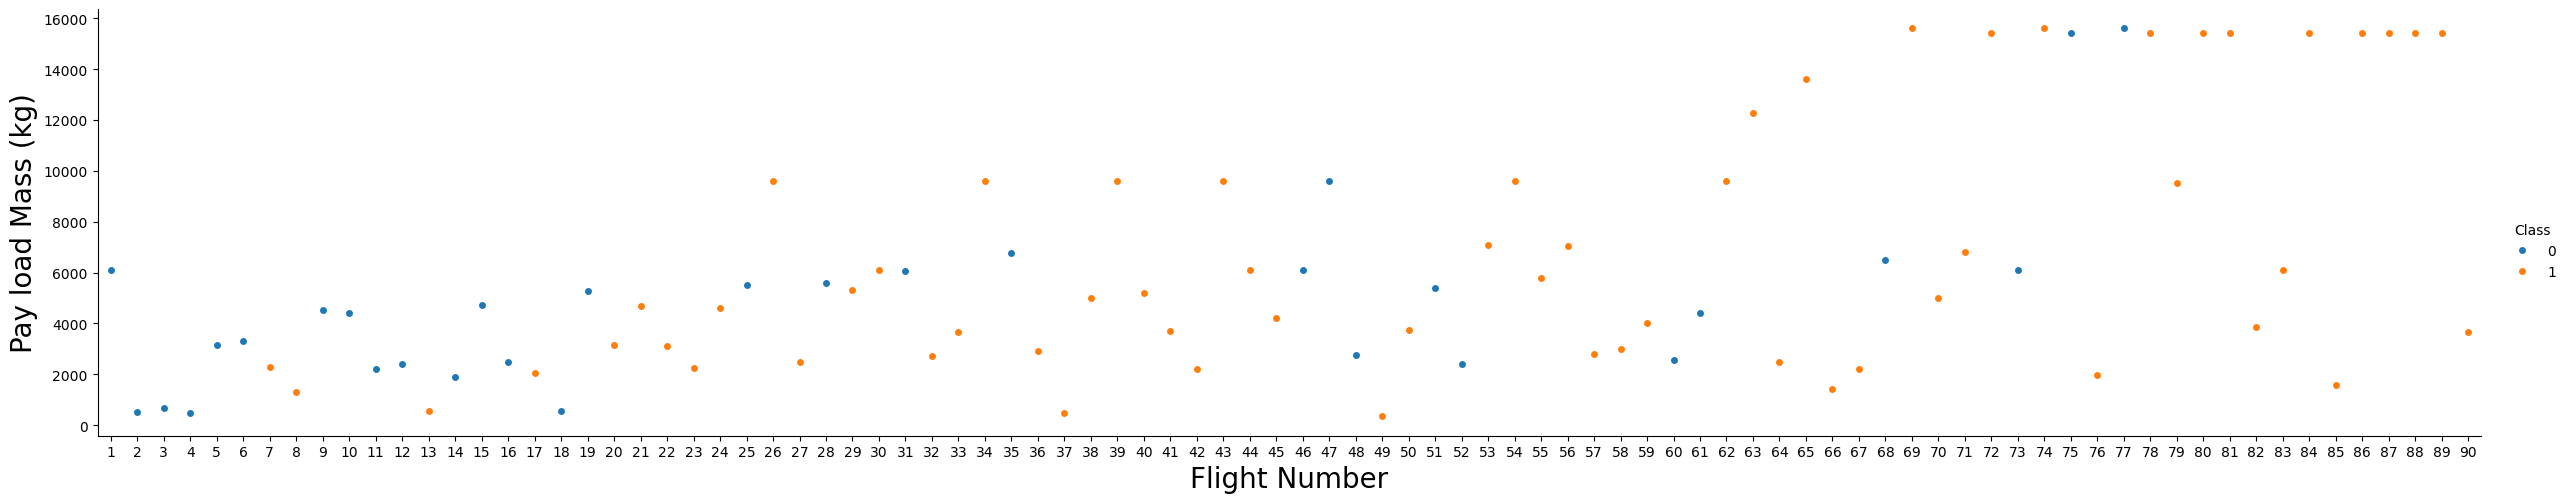

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


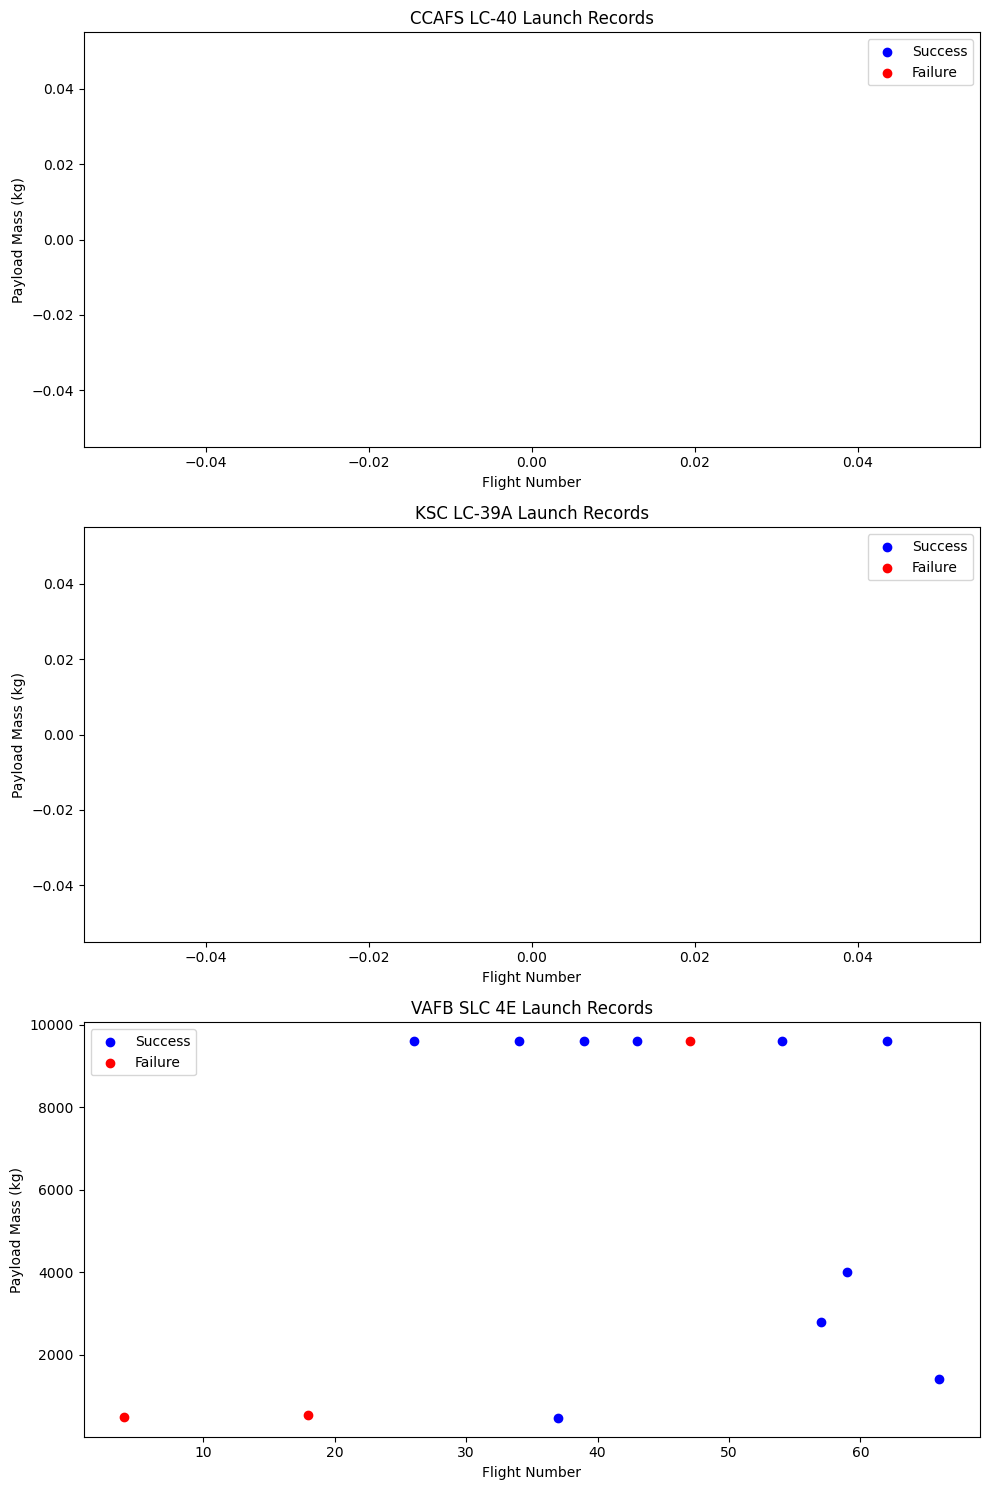

In [7]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Assuming you have a DataFrame named 'data' containing your launch data
# Make sure it has columns: 'FlightNumber', 'PayloadMass', 'LaunchSite', and 'Class'

# Filter data for each launch site
ccafs_data = df[df['LaunchSite'] == 'CCAFS LC-40']
ksc_data = df[df['LaunchSite'] == 'KSC LC-39A']
vafb_data = df[df['LaunchSite'] == 'VAFB SLC 4E']

# Create subplots for each launch site
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Function to plot data for each launch site
def plot_launch_records(ax, site_data, site_name):
    success = site_data[site_data['Class'] == 1]
    failure = site_data[site_data['Class'] == 0]

    ax.scatter(success['FlightNumber'], success['PayloadMass'], color='blue', label='Success')
    ax.scatter(failure['FlightNumber'], failure['PayloadMass'], color='red', label='Failure')
    ax.set_title(f'{site_name} Launch Records')
    ax.set_xlabel('Flight Number')
    ax.set_ylabel('Payload Mass (kg)')
    ax.legend()

# Plot for CCAFS LC-40
plot_launch_records(axs[0], ccafs_data, 'CCAFS LC-40')

# Plot for KSC LC-39A
plot_launch_records(axs[1], ksc_data, 'KSC LC-39A')

# Plot for VAFB SLC 4E
plot_launch_records(axs[2], vafb_data, 'VAFB SLC 4E')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


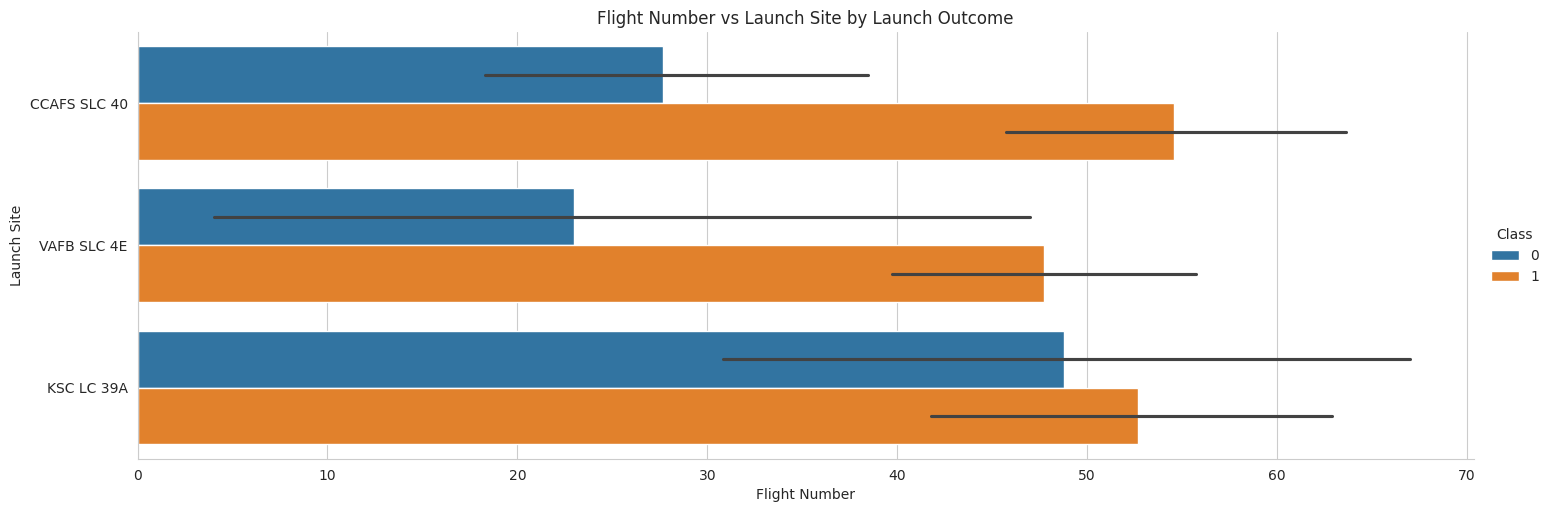

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Set the style of the plot
sns.set_style("whitegrid")

# Create the categorical plot (catplot)
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='bar', aspect=3)

# Set labels and title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site by Launch Outcome')

# Show the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


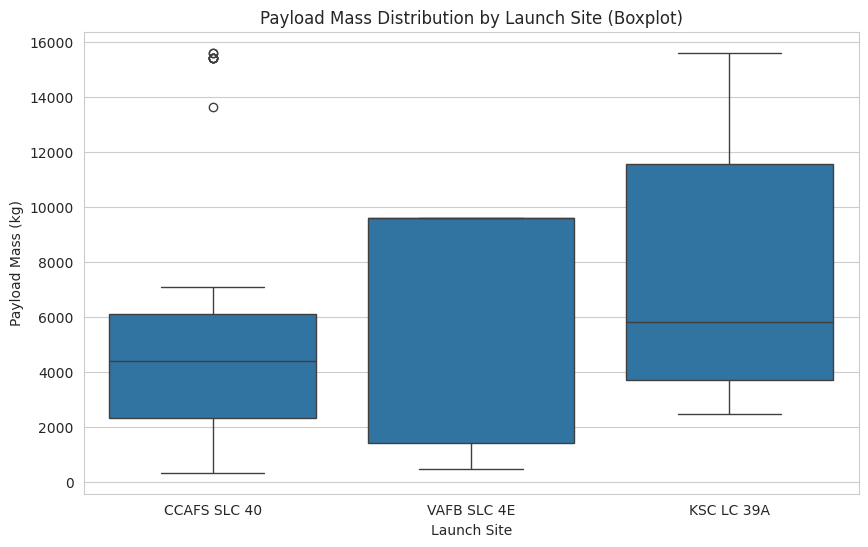

In [12]:
### TASK 2: Visualize the relationship between Payload and Launch Site
# Set the style of the plot
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='LaunchSite', y='PayloadMass', data=df)
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass (kg)')
plt.title('Payload Mass Distribution by Launch Site (Boxplot)')
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


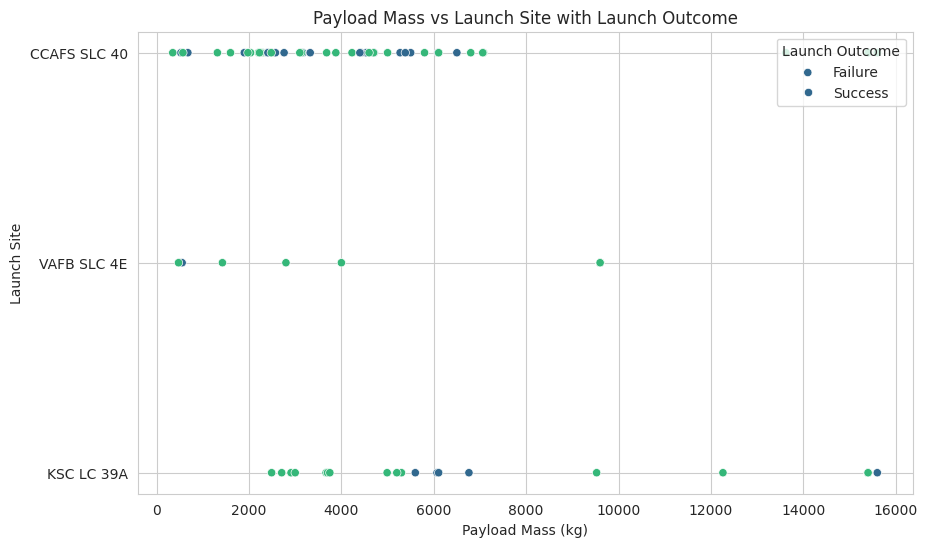

In [13]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Set the style of the plot
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, palette='viridis')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site with Launch Outcome')
plt.legend(title='Launch Outcome', loc='upper right', labels=['Failure', 'Success'])
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


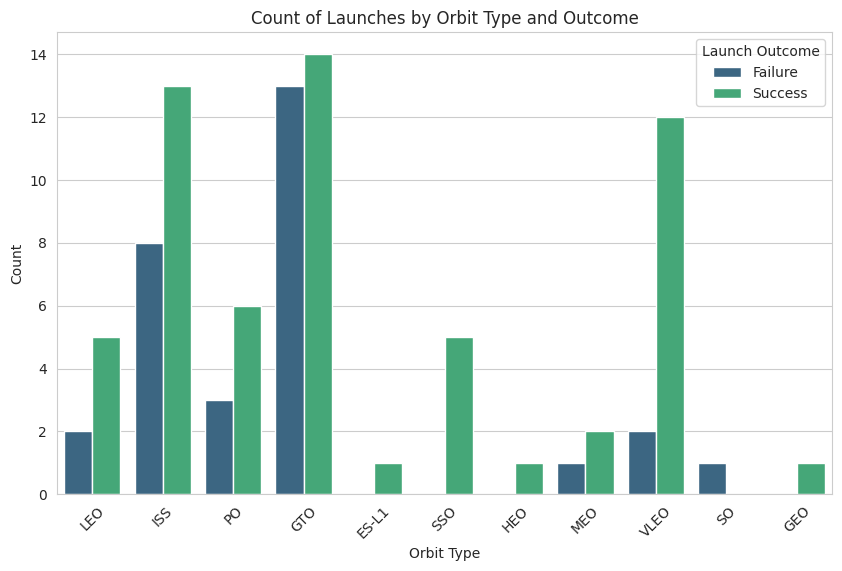

In [14]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Orbit', hue='Class', data=df, palette='viridis')
plt.xlabel('Orbit Type')
plt.ylabel('Count')
plt.title('Count of Launches by Orbit Type and Outcome')
plt.legend(title='Launch Outcome', loc='upper right', labels=['Failure', 'Success'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


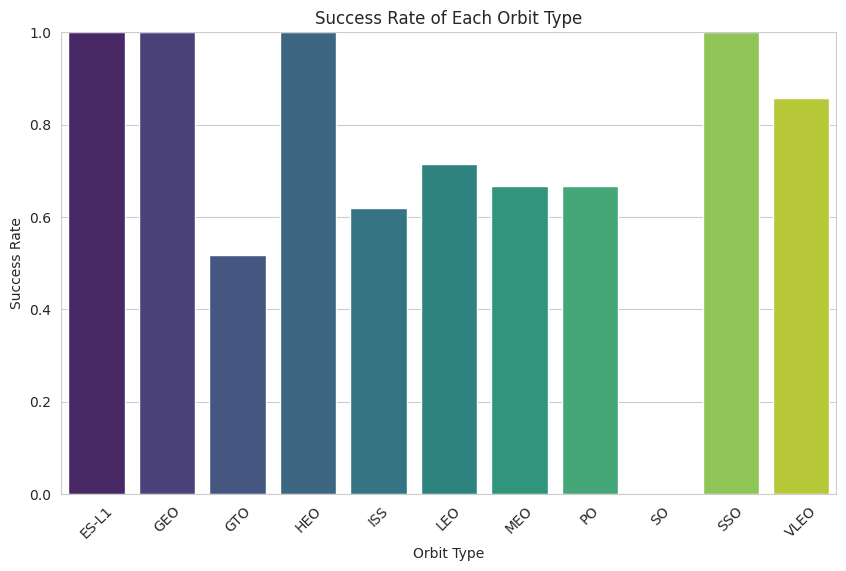

In [17]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, hue='Orbit', palette='viridis')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate of Each Orbit Type')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1 for success rate
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


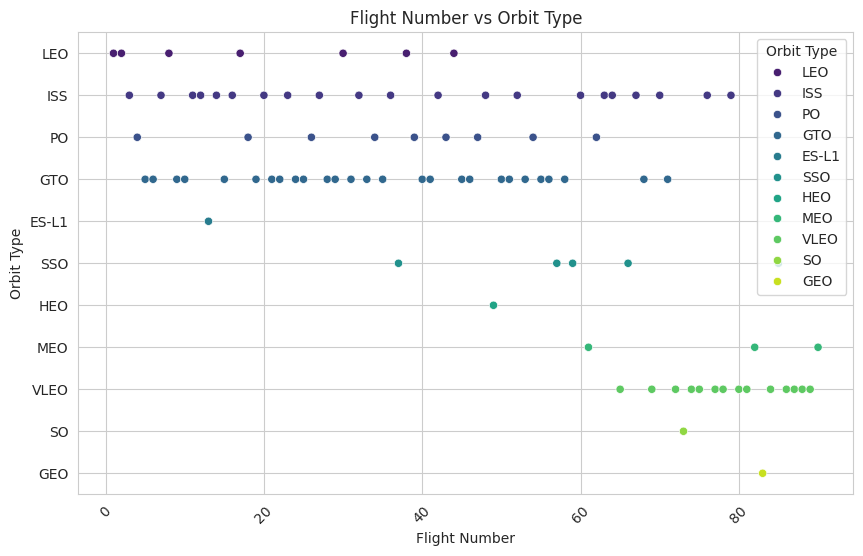

In [19]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Set the style of the plot
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Orbit', palette='viridis')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.title('Flight Number vs Orbit Type')
plt.legend(title='Orbit Type', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


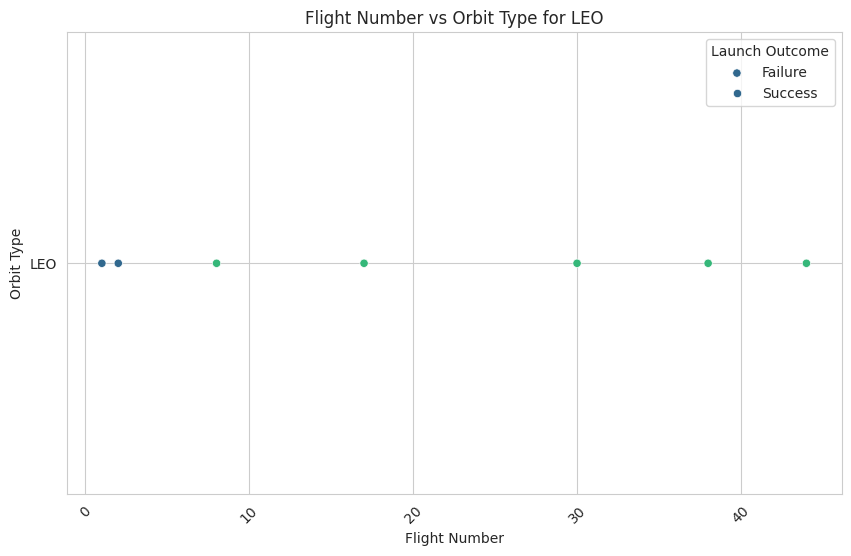

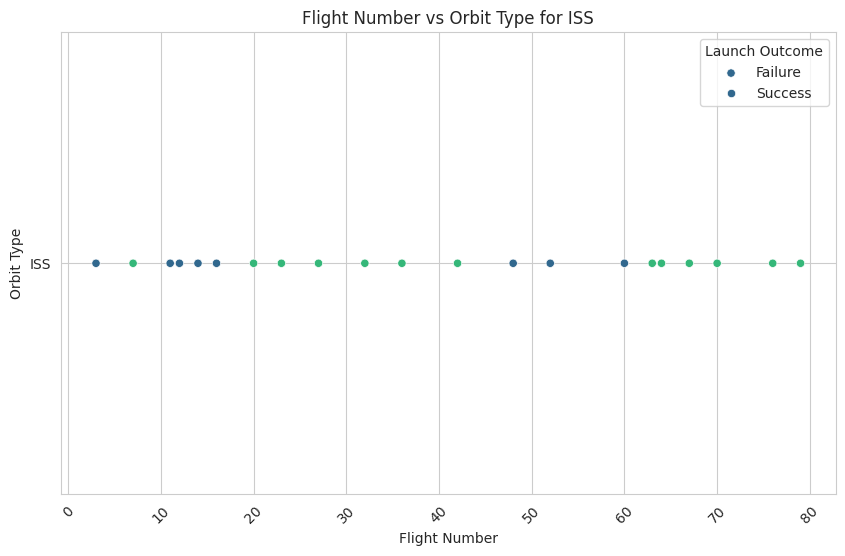

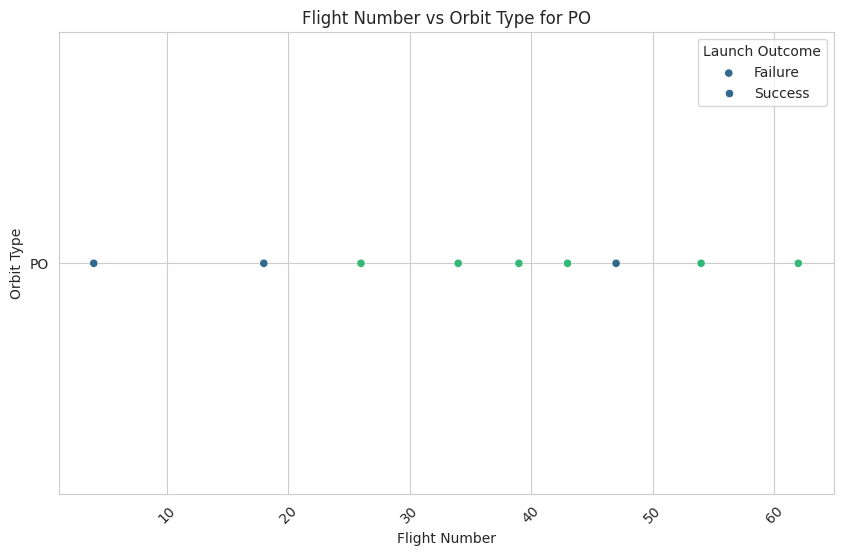

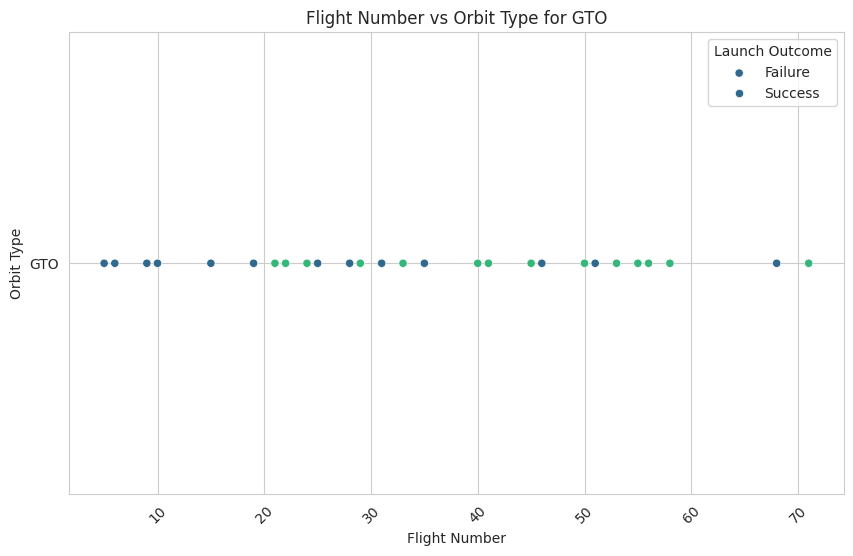

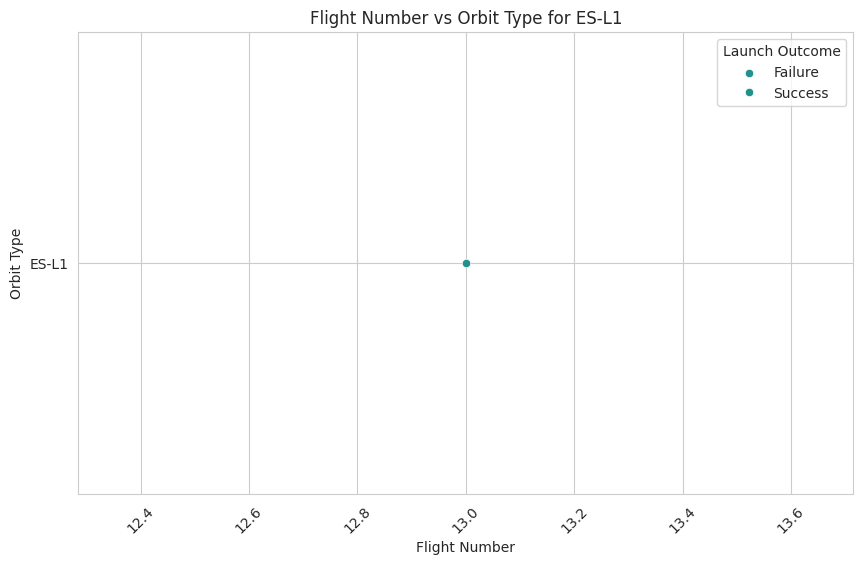

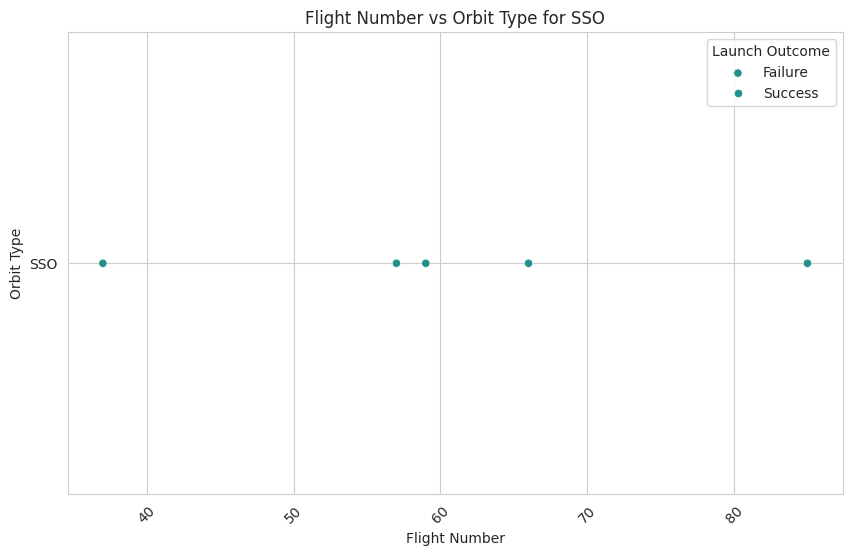

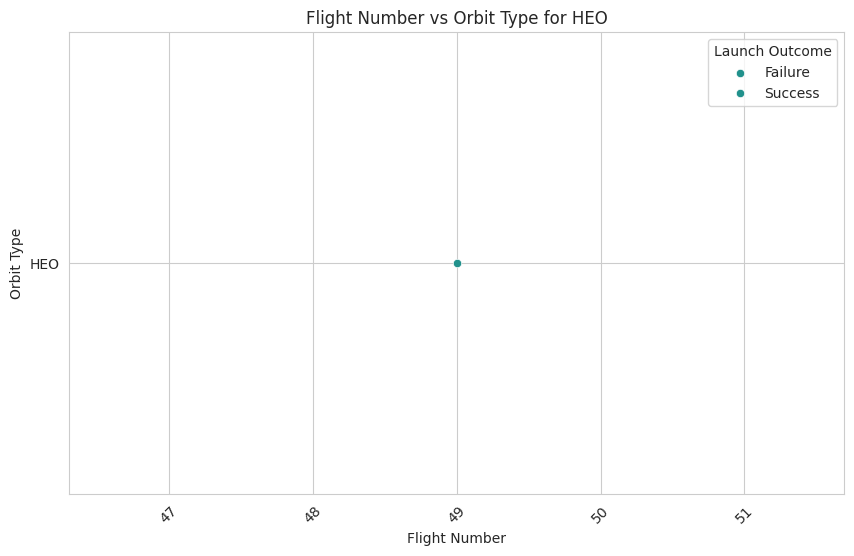

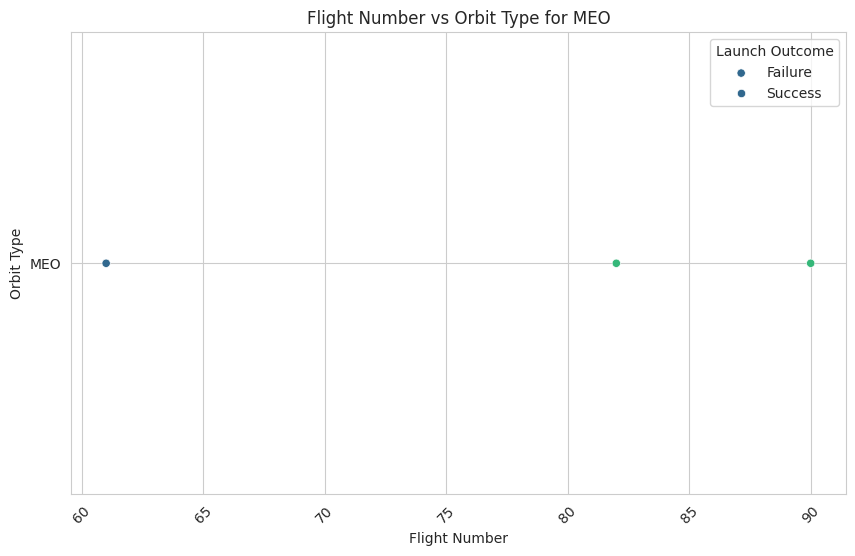

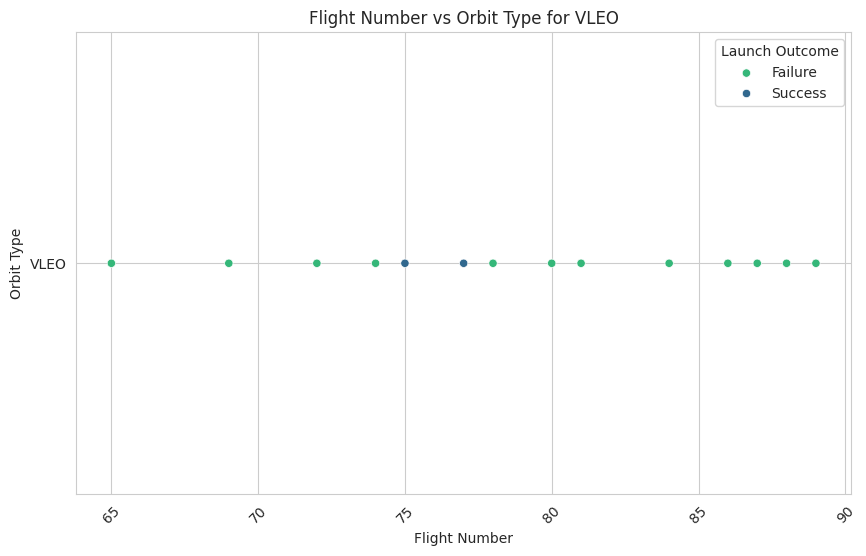

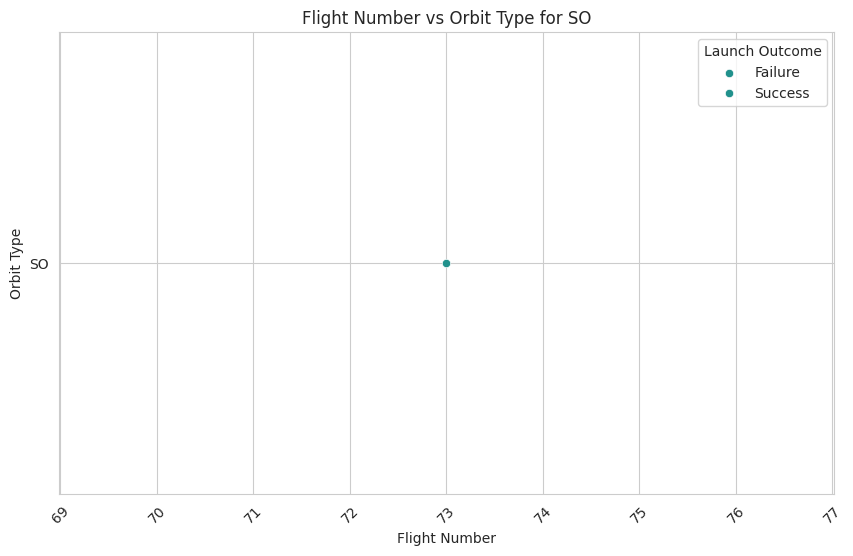

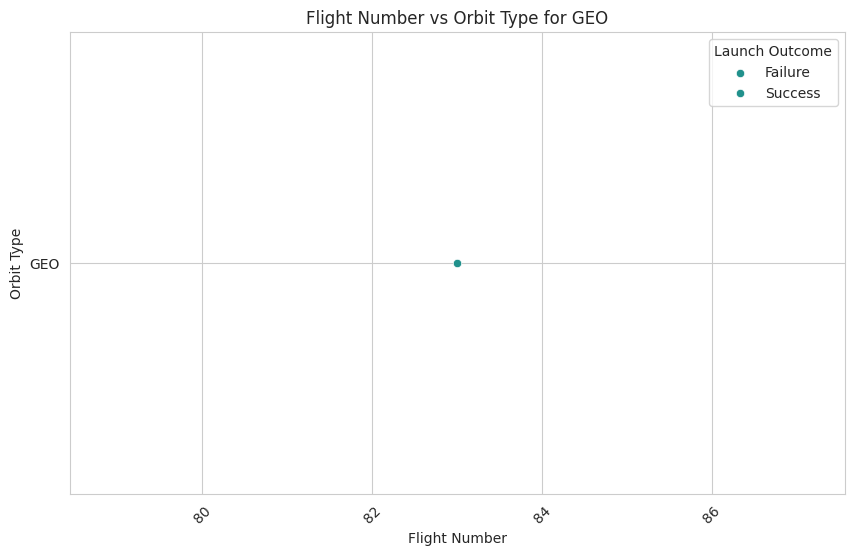

In [22]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Set the style of the plot
sns.set_style("whitegrid")

# Get unique orbit types
orbit_types = df['Orbit'].unique()

# Create a scatter plot for each orbit type
for orbit in orbit_types:
    plt.figure(figsize=(10, 6))
    orbit_data = df[df['Orbit'] == orbit]
    sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=orbit_data, palette='viridis')
    plt.xlabel('Flight Number')
    plt.ylabel('Orbit Type')
    plt.title(f'Flight Number vs Orbit Type for {orbit}')
    plt.legend(title='Launch Outcome', loc='upper right', labels=['Failure', 'Success'])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


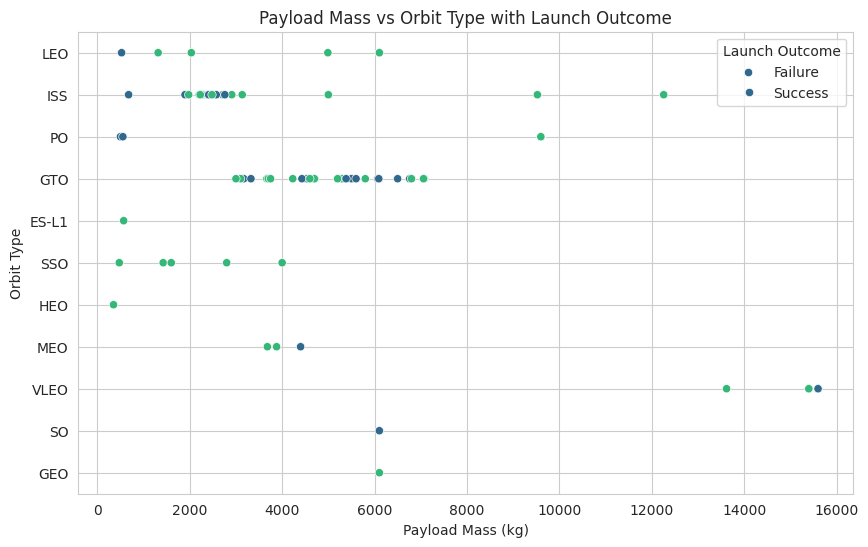

In [23]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Set the style of the plot
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='viridis')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.title('Payload Mass vs Orbit Type with Launch Outcome')
plt.legend(title='Launch Outcome', loc='upper right', labels=['Failure', 'Success'])
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


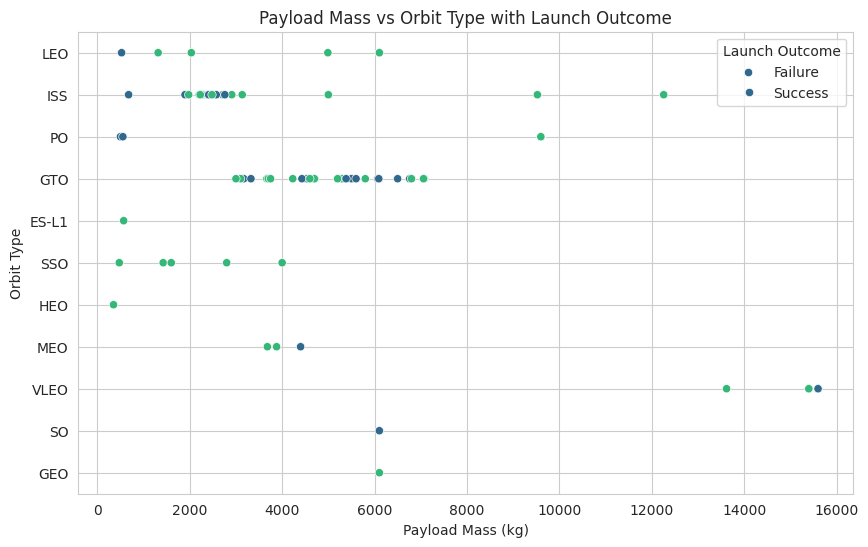

In [24]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Set the style of the plot
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='viridis')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.title('Payload Mass vs Orbit Type with Launch Outcome')
plt.legend(title='Launch Outcome', loc='upper right', labels=['Failure', 'Success'])
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


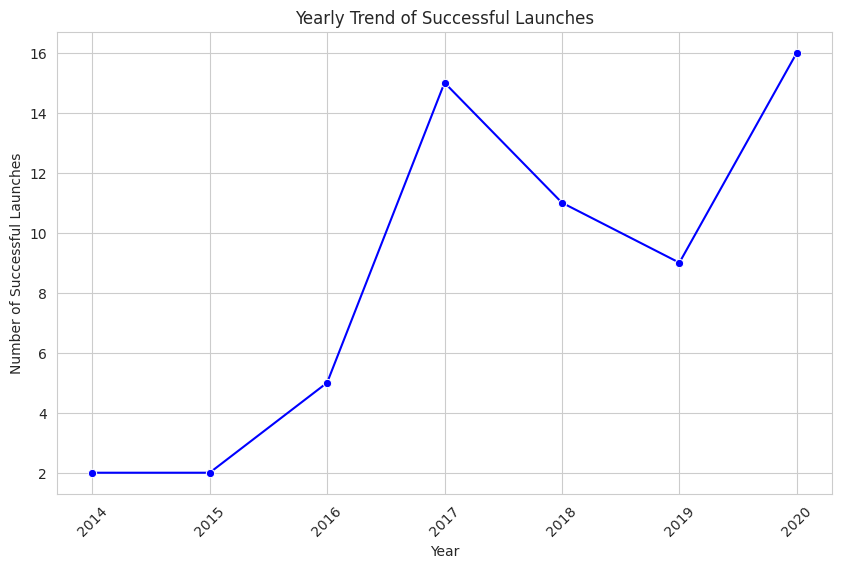

In [29]:
### TASK  6: Visualize the launch success yearly trend

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate the count of successful launches for each year
success_count = df[df['Class'] == 1].groupby('Year')['Class'].count().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=success_count, marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Successful Launches')
plt.title('Yearly Trend of Successful Launches')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

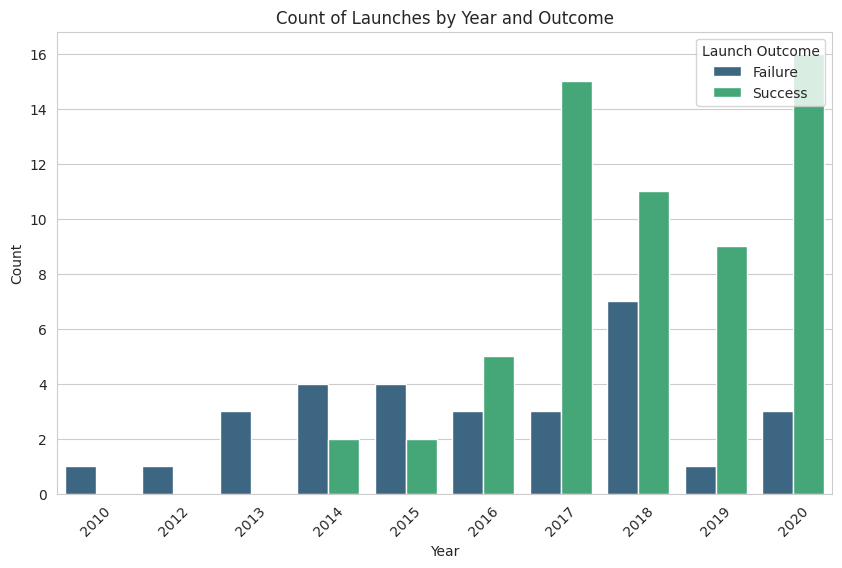

In [32]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Year'], hue=df['Class'], palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Launches by Year and Outcome')
plt.legend(title='Launch Outcome', loc='upper right', labels=['Failure', 'Success'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

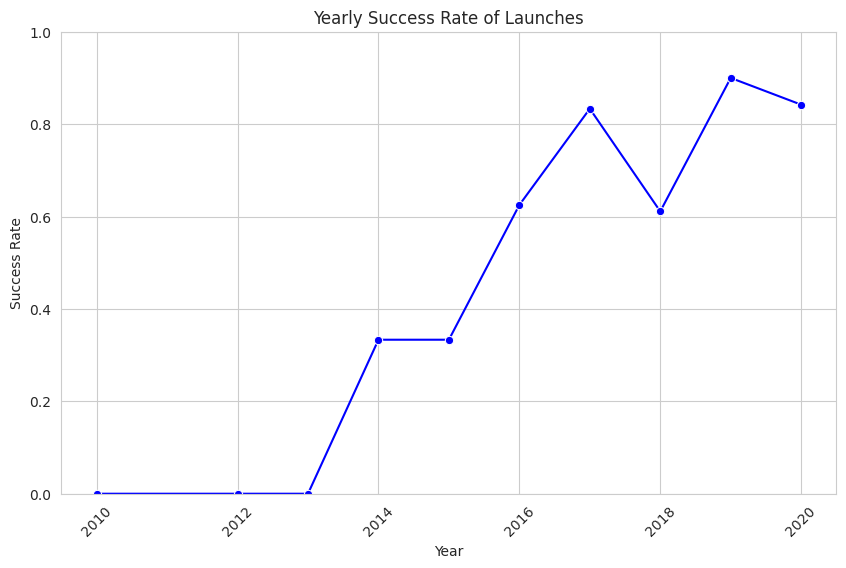

In [33]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Set the style of the plot
sns.set_style("whitegrid")

# Calculate the success rate for each year
success_rate = df.groupby('Year')['Class'].mean().reset_index()
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=success_rate, marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Yearly Success Rate of Launches')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1 for success rate
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [45]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [41]:
### TASK  7: Create dummy variables to categorical columns
categorical_columns = ['Orbit', 'LaunchSite']

# Create dummy variables for the selected columns
dummy_df = pd.get_dummies(features[categorical_columns], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
features = pd.concat([features, dummy_df], axis=1)

# Drop the original categorical columns if needed
features.drop(columns=categorical_columns, inplace=True)

# Display the updated DataFrame with dummy variables
print(features.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs LandingPad  \
0             1  6104.959412        1     False   False  False        NaN   
1             2   525.000000        1     False   False  False        NaN   
2             3   677.000000        1     False   False  False        NaN   
3             4   500.000000        1     False   False  False        NaN   
4             5  3170.000000        1     False   False  False        NaN   

   Block  ReusedCount Serial  ...  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  \
0    1.0            0  B0003  ...          0          0          1          0   
1    1.0            0  B0005  ...          0          0          1          0   
2    1.0            0  B0007  ...          0          1          0          0   
3    1.0            0  B1003  ...          0          0          0          0   
4    1.0            0  B1004  ...          0          0          0          0   

   Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  Laun

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [47]:
# Here are the columns we want to convert to dummy variables
categorical_columnss = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Create dummy variables for the selected columns
dummy_df = pd.get_dummies(features[categorical_columnss], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
features = pd.concat([features, dummy_df], axis=1)

# Drop the original categorical columns if needed
features.drop(columns=categorical_columnss, inplace=True)

# Display the updated DataFrame with dummy variables
print(features.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0            0          0          0  ...             0             0   
1            0          0          0  ...             0             0   
2            0          0          0  ...             0             0   
3            0          0          0  ...             0             0   
4            0          0          1  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0             0    

In [48]:
### TASK  8: Cast all numeric columns to `float64`
# Cast all numeric columns to float64
features = features.astype(float)

# Display the updated DataFrame
print(features.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0  6104.959412      1.0       0.0     0.0   0.0    1.0   
1           2.0   525.000000      1.0       0.0     0.0   0.0    1.0   
2           3.0   677.000000      1.0       0.0     0.0   0.0    1.0   
3           4.0   500.000000      1.0       0.0     0.0   0.0    1.0   
4           5.0  3170.000000      1.0       0.0     0.0   0.0    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0          0.0        0.0        0.0  ...           0.0           0.0   
1          0.0        0.0        0.0  ...           0.0           0.0   
2          0.0        0.0        0.0  ...           0.0           0.0   
3          0.0        0.0        0.0  ...           0.0           0.0   
4          0.0        0.0        1.0  ...           0.0           0.0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0           0.0           0.0           0.0          

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [50]:
features.to_csv('dataset_part\_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
